In [2]:
# Import libraries
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import infotopo

**Quick code to plot timeseries example**

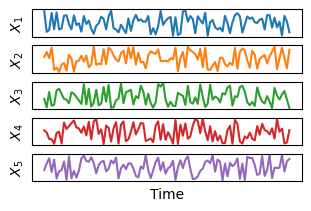

In [6]:
# Generate random time series data
n_series = 5
n_points = 100
time = np.linspace(0, 10, n_points)
data = np.random.rand(n_series, n_points)

# Create subplots
fig, axes = plt.subplots(n_series, 1, figsize=(3, 2), sharex=True, constrained_layout=True)

# Plot each time series
for i, ax in enumerate(axes):
    ax.plot(time, data[i], label=f"Series {i + 1}", color=f"C{i}")
    #ax.set_ylim(0, 1)
    ax.set_ylabel(f"$X_{i + 1}$")
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    #ax.legend(loc="upper right")

# Label the common x-axis
axes[-1].set_xlabel("Time")

# Show the plot
plt.show()


**Implement moving window to explore the time dynamics**

In [2]:
df = pd.read_csv("C:\\Users\\cyril\\Documents\\Personal\\Github\\PhD_1\\timeseries_test.txt", sep='\t', header=0, usecols=lambda col: col != 'Time')  # choose between timeseries_test.txt and timeseries_test2.txt

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # Import Image module from Pillow
from scipy.stats import norm

# Example data
data1 = df.iloc[:, 0].tolist()
data2 = df.iloc[:, 1].tolist()
data3 = df.iloc[:, 2].tolist()  # Adding a third dataset
window_size = 100
frames = []

# Convert data1, data2, and data3 to NumPy arrays
data1 = np.array(data1)
data2 = np.array(data2)
data3 = np.array(data3)

# Calculate the 99th and 1st percentile of the total data
total_data = np.concatenate([data1, data2, data3])
quantile_99 = np.percentile(total_data, 99)
quantile_01 = np.percentile(total_data, 1)

# Set the extremes to the quantile threshold for all datasets
for data in [data1, data2, data3]:
    data[data > quantile_99] = quantile_99
    data[data < quantile_01] = quantile_01

for base in np.arange(0, len(data1) - window_size - window_size - window_size, 10):
    front_limit1 = base
    back_limit1 = base + window_size
    front_limit2 = base + window_size
    back_limit2 = base + window_size + window_size
    front_limit3 = base + 2 * window_size
    back_limit3 = base + 2 * window_size + window_size
    
    # Perform random walk
    walk1 = data1[front_limit1:back_limit1]
    walk2 = data2[front_limit2:back_limit2]
    walk3 = data3[front_limit3:back_limit3]

    # Create a figure with three subplots
    fig, axs = plt.subplots(3, 2, figsize=(15, 9), gridspec_kw={'width_ratios': [5, 1]})

    # Plot time series 1
    axs[0, 0].plot(range(len(data1)), data1)
    axs[0, 0].axvline(x=front_limit1, color='red', linestyle='--')
    axs[0, 0].axvline(x=back_limit1, color='red', linestyle='--')
    axs[0, 0].fill_between(range(front_limit1, back_limit1), min(data1), max(data1), color='salmon', alpha=0.3)
    axs[0, 0].set_ylabel('$X_1$')

    # Generate standard normal distribution 1
    x_values = np.linspace(front_limit1, back_limit1, window_size)
    mean = (front_limit1 + back_limit1) / 2  # Set the mean at the center of the range
    std_dev = (back_limit1 - front_limit1) / 6  # Set std dev to fit well within the range
    y_values = norm.pdf(x_values, loc=mean, scale=std_dev)
    y_min, y_max = min(y_values), max(y_values)
    y_values = (y_values - y_min) / (y_max - y_min) # Normalize y_values
    axs[0, 0].plot(x_values, y_values, color='black', linestyle='-', linewidth=1)

    # Plot histogram 1
    hist1, bin_edges1 = np.histogram(walk1, bins=16)
    axs[0, 1].hist(walk1, bins=16, color='salmon', edgecolor='black', orientation='horizontal')
    axs[0, 1].set_xticks([])
    axs[0, 1].set_ylim(quantile_01, quantile_99)
    axs[0, 1].set_yticks([quantile_01, 0.5, quantile_99])
    axs[0, 1].set_yticklabels(['1', '8', '16'])
    axs[0, 1].set_ylabel('#bin')

    # Plot time series 2
    axs[1, 0].plot(range(len(data2)), data2)
    axs[1, 0].axvline(x=front_limit2, color='red', linestyle='--')
    axs[1, 0].axvline(x=back_limit2, color='red', linestyle='--')
    axs[1, 0].fill_between(range(front_limit2, back_limit2), min(data2), max(data2), color='salmon', alpha=0.3)
    axs[1, 0].set_ylabel('$X_2$')

    # Generate standard normal distribution 2
    x_values = np.linspace(front_limit2, back_limit2, window_size)
    mean = (front_limit2 + back_limit2) / 2  # Set the mean at the center of the range
    std_dev = (back_limit2 - front_limit2) / 6  # Set std dev to fit well within the range
    y_values = norm.pdf(x_values, loc=mean, scale=std_dev)
    y_min, y_max = min(y_values), max(y_values)
    y_values = (y_values - y_min) / (y_max - y_min) # Normalize y_values
    axs[1, 0].plot(x_values, y_values, color='black', linestyle='-', linewidth=1)

    # Plot histogram 2
    hist2, bin_edges2 = np.histogram(walk2, bins=16)
    axs[1, 1].hist(walk2, bins=16, color='salmon', edgecolor='black', orientation='horizontal')
    axs[1, 1].set_xticks([])
    axs[1, 1].set_ylim(quantile_01, quantile_99)
    axs[1, 1].set_yticks([quantile_01, 0.5, quantile_99])
    axs[1, 1].set_yticklabels(['1', '8', '16'])
    axs[1, 1].set_ylabel('#bin')

    # Plot time series 3
    axs[2, 0].plot(range(len(data3)), data3)
    axs[2, 0].axvline(x=front_limit3, color='red', linestyle='--')
    axs[2, 0].axvline(x=back_limit3, color='red', linestyle='--')
    axs[2, 0].fill_between(range(front_limit3, back_limit3), min(data3), max(data3), color='salmon', alpha=0.3)
    axs[2, 0].set_xlabel('Time')
    axs[2, 0].set_ylabel('$X_3$')

    # Generate standard normal distribution 3
    x_values = np.linspace(front_limit3, back_limit3, window_size)
    mean = (front_limit3 + back_limit3) / 2  # Set the mean at the center of the range
    std_dev = (back_limit3 - front_limit3) / 6  # Set std dev to fit well within the range
    y_values = norm.pdf(x_values, loc=mean, scale=std_dev)
    y_min, y_max = min(y_values), max(y_values)
    y_values = (y_values - y_min) / (y_max - y_min) # Normalize y_values
    axs[2, 0].plot(x_values, y_values, color='black', linestyle='-', linewidth=1)

    # Plot histogram 3
    hist3, bin_edges3 = np.histogram(walk3, bins=16)
    axs[2, 1].hist(walk3, bins=16, color='salmon', edgecolor='black', orientation='horizontal')
    axs[2, 1].set_xticks([])
    axs[2, 1].set_ylim(quantile_01, quantile_99)
    axs[2, 1].set_yticks([quantile_01, 0.5, quantile_99])
    axs[2, 1].set_yticklabels(['1', '8', '16'])
    axs[2, 1].set_ylabel('#bin')

    # Adjust layout
    plt.tight_layout()

    # Convert figure to PIL Image
    fig.canvas.draw()
    img = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())

    # Append the current frame to the list of frames
    frames.append(img)

    # Close the figure to avoid memory leaks
    plt.close(fig)

# Save frames as GIF
frames[0].save('timeseries_moving_window.gif', save_all=True, append_images=frames[:], optimize=False, duration=300, loop=0)


C:\Users\cyril\AppData\Local\Temp\ipykernel_17640\1845242482.py:125: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  img = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())
C:\Users\cyril\AppData\Local\Temp\ipykernel_17640\1845242482.py:125: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  img = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())
C:\Users\cyril\AppData\Local\Temp\ipykernel_17640\1845242482.py:125: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  img = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())
C:\Users\cyril\AppData\Local\Temp\ipykernel_17